In [ ]:
!nvidia-smi

Wed Jan 31 14:05:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
HOME

'/content'

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 50.6MB/s]
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 49.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 243.3ms
Speed: 3.3ms preprocess, 243.3ms inference, 1781.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


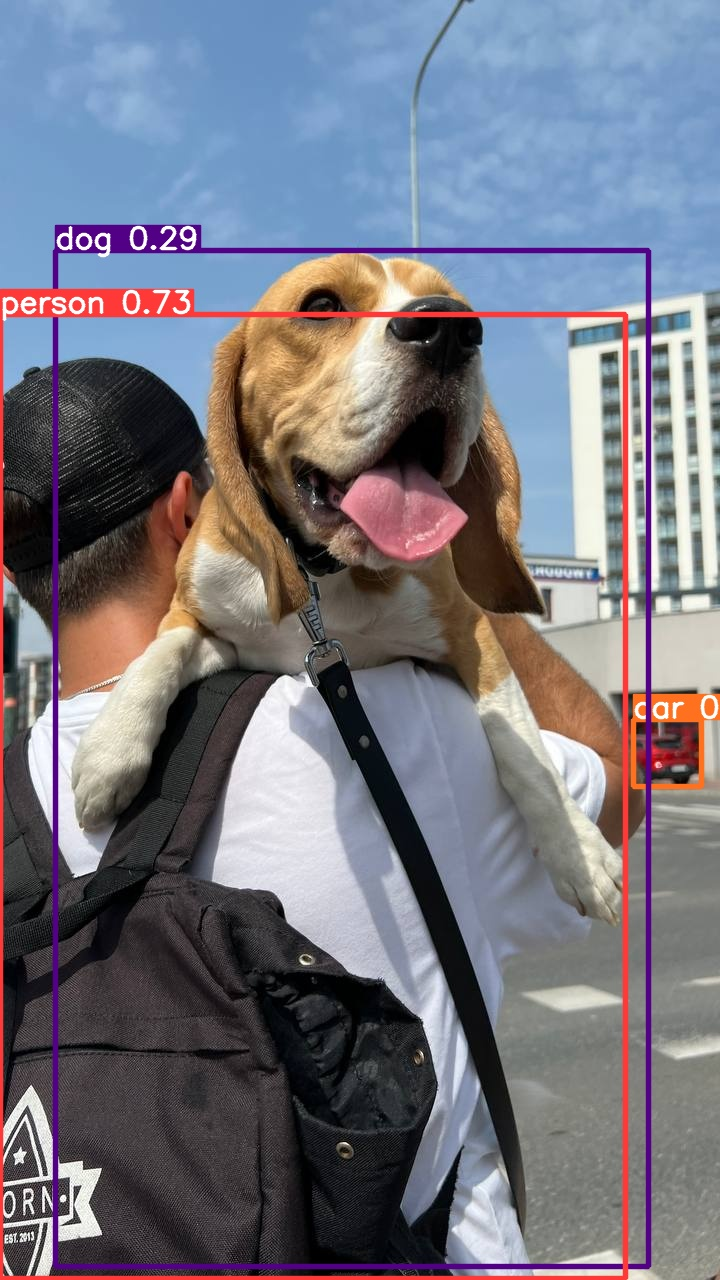

In [ ]:
%cd {HOME}
Image(filename="runs/detect/predict/dog.jpeg", height = 600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

In [ ]:
results = model.predict(source ="runs/detect/predict/dog.jpeg", conf=0.25)


image 1/1 /content/runs/detect/predict/dog.jpeg: 640x384 2 persons, 1 dog, 108.4ms
Speed: 7.4ms preprocess, 108.4ms inference, 560.3ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="IXmbdyKmZsNYlsKDnFEl")
project = rf.workspace("personal-use-eanw2").project("skirt-detection-71vnq")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Skirt-Detection-1 in yolov8:: 100%|██████████| 18702/18702 [00:04<00:00, 3906.94it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 save=True

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Skirt-Detection-1/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

/content


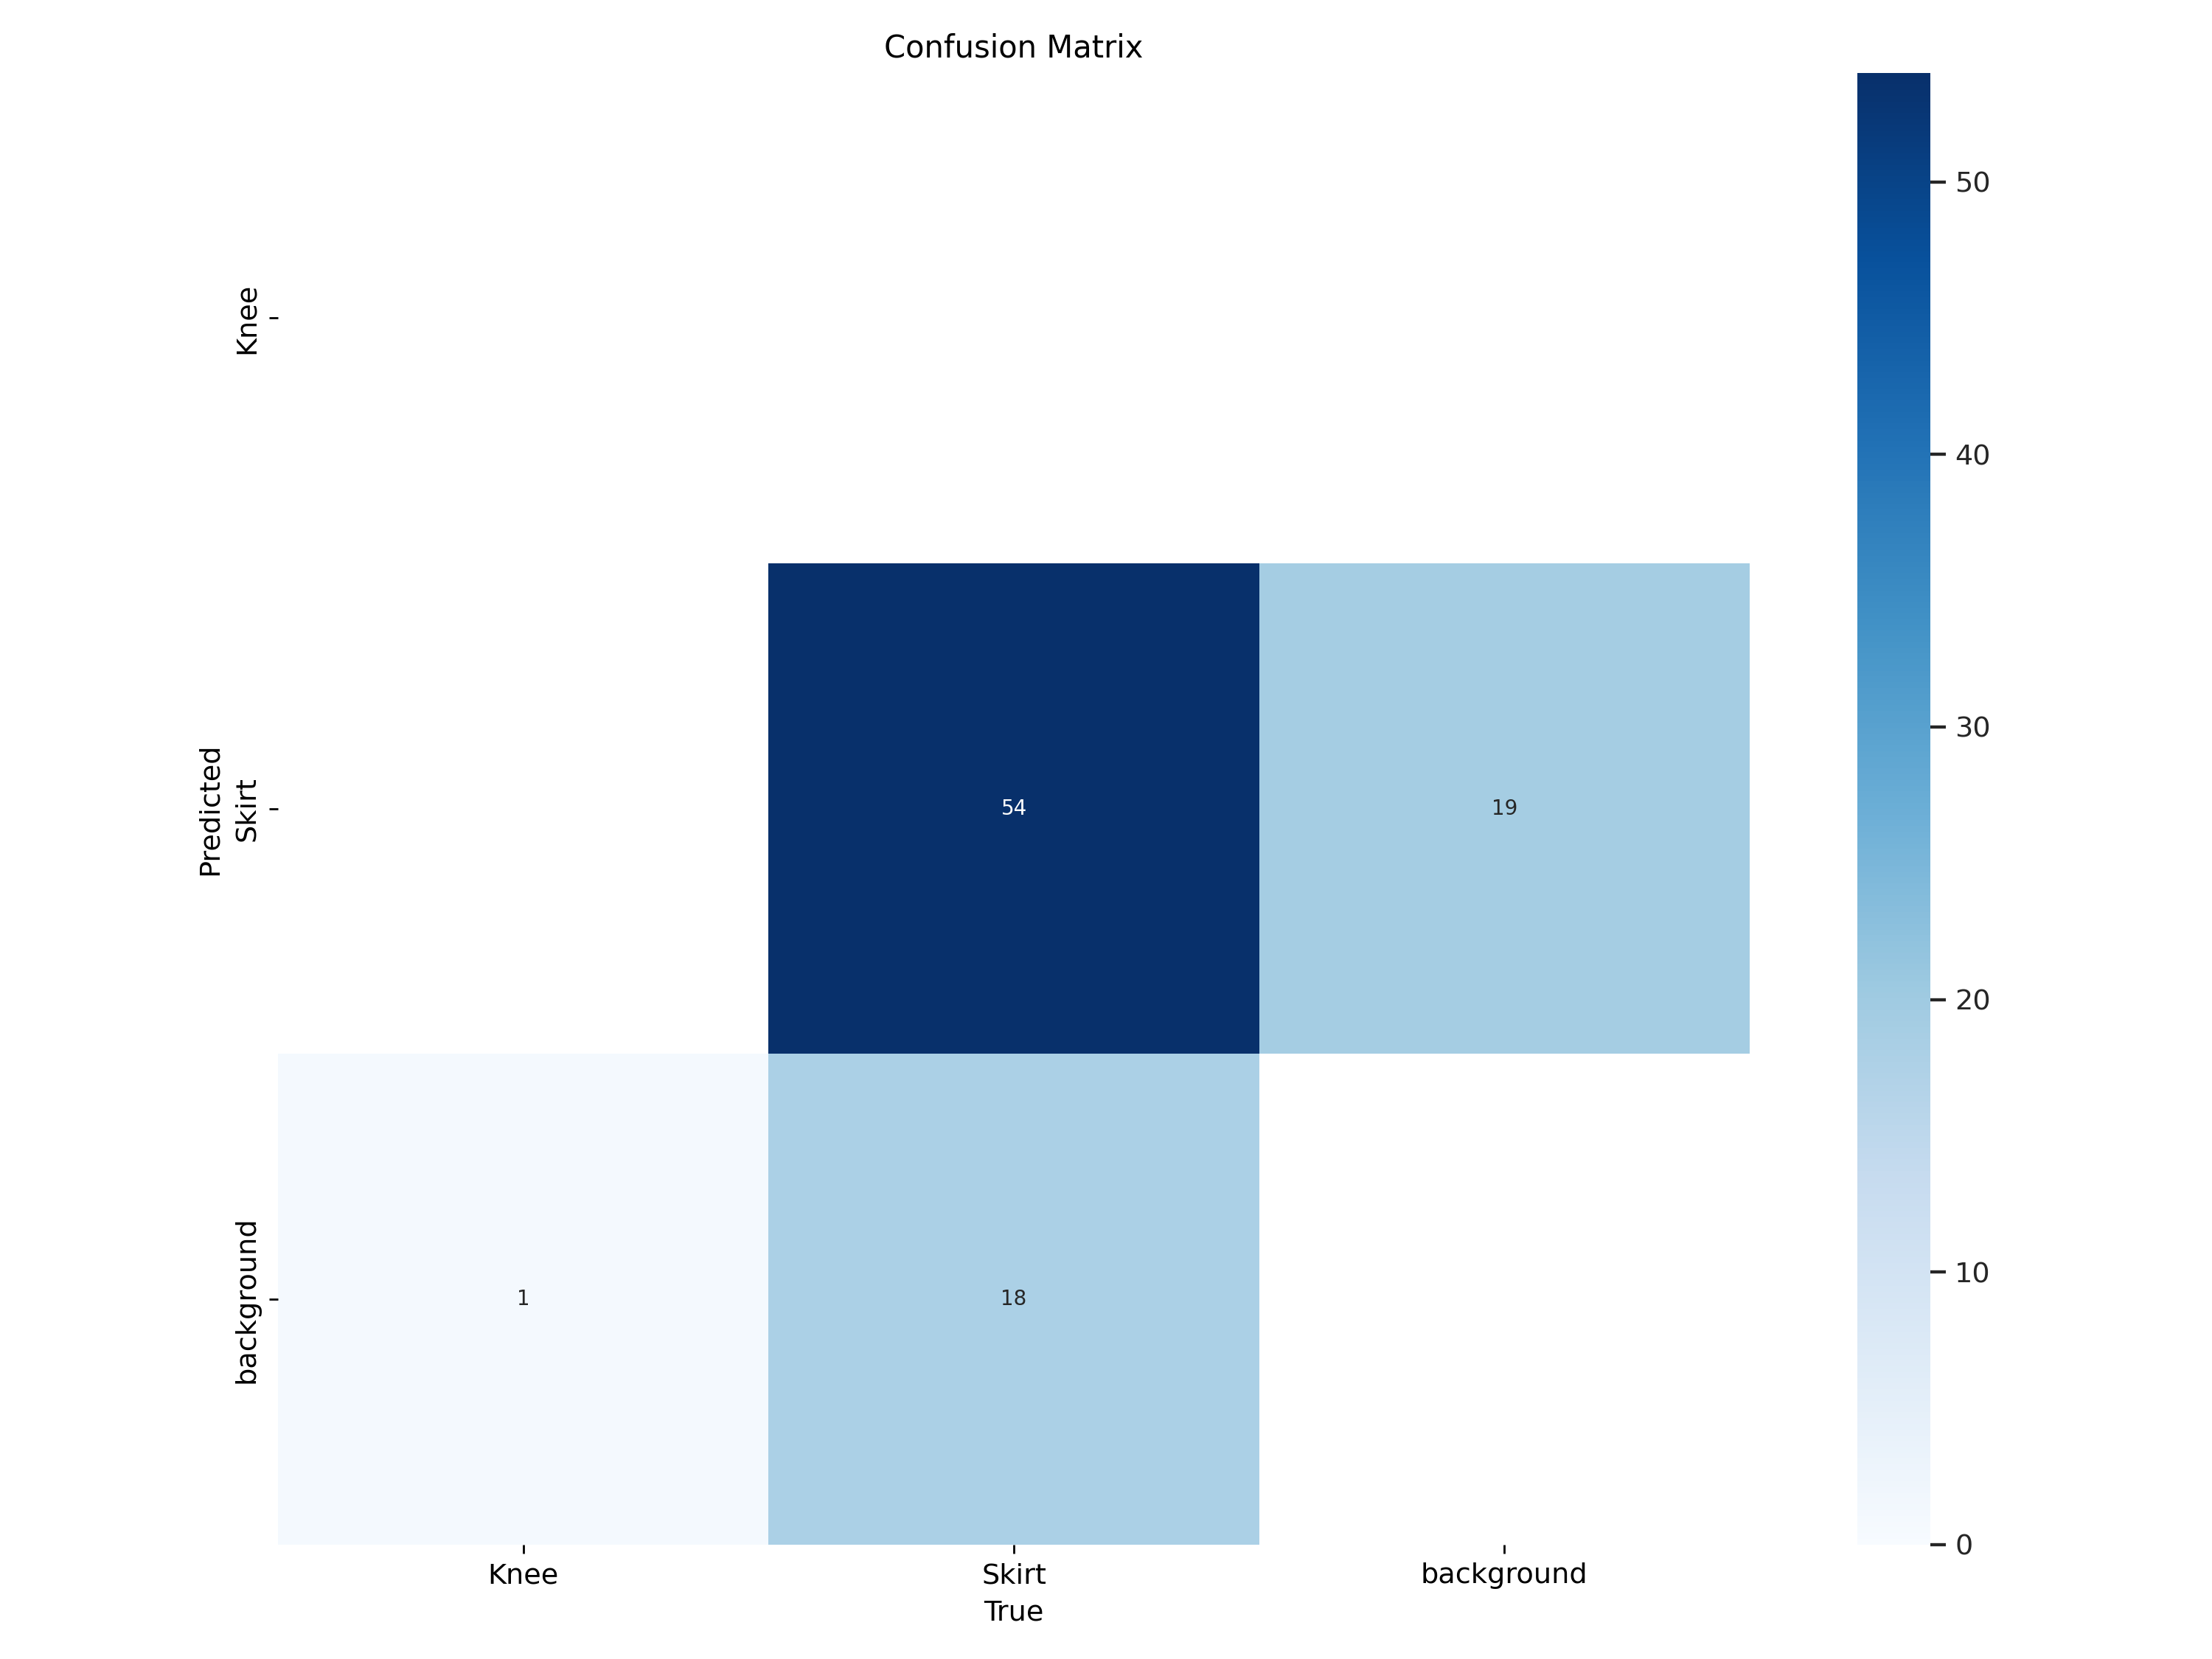

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


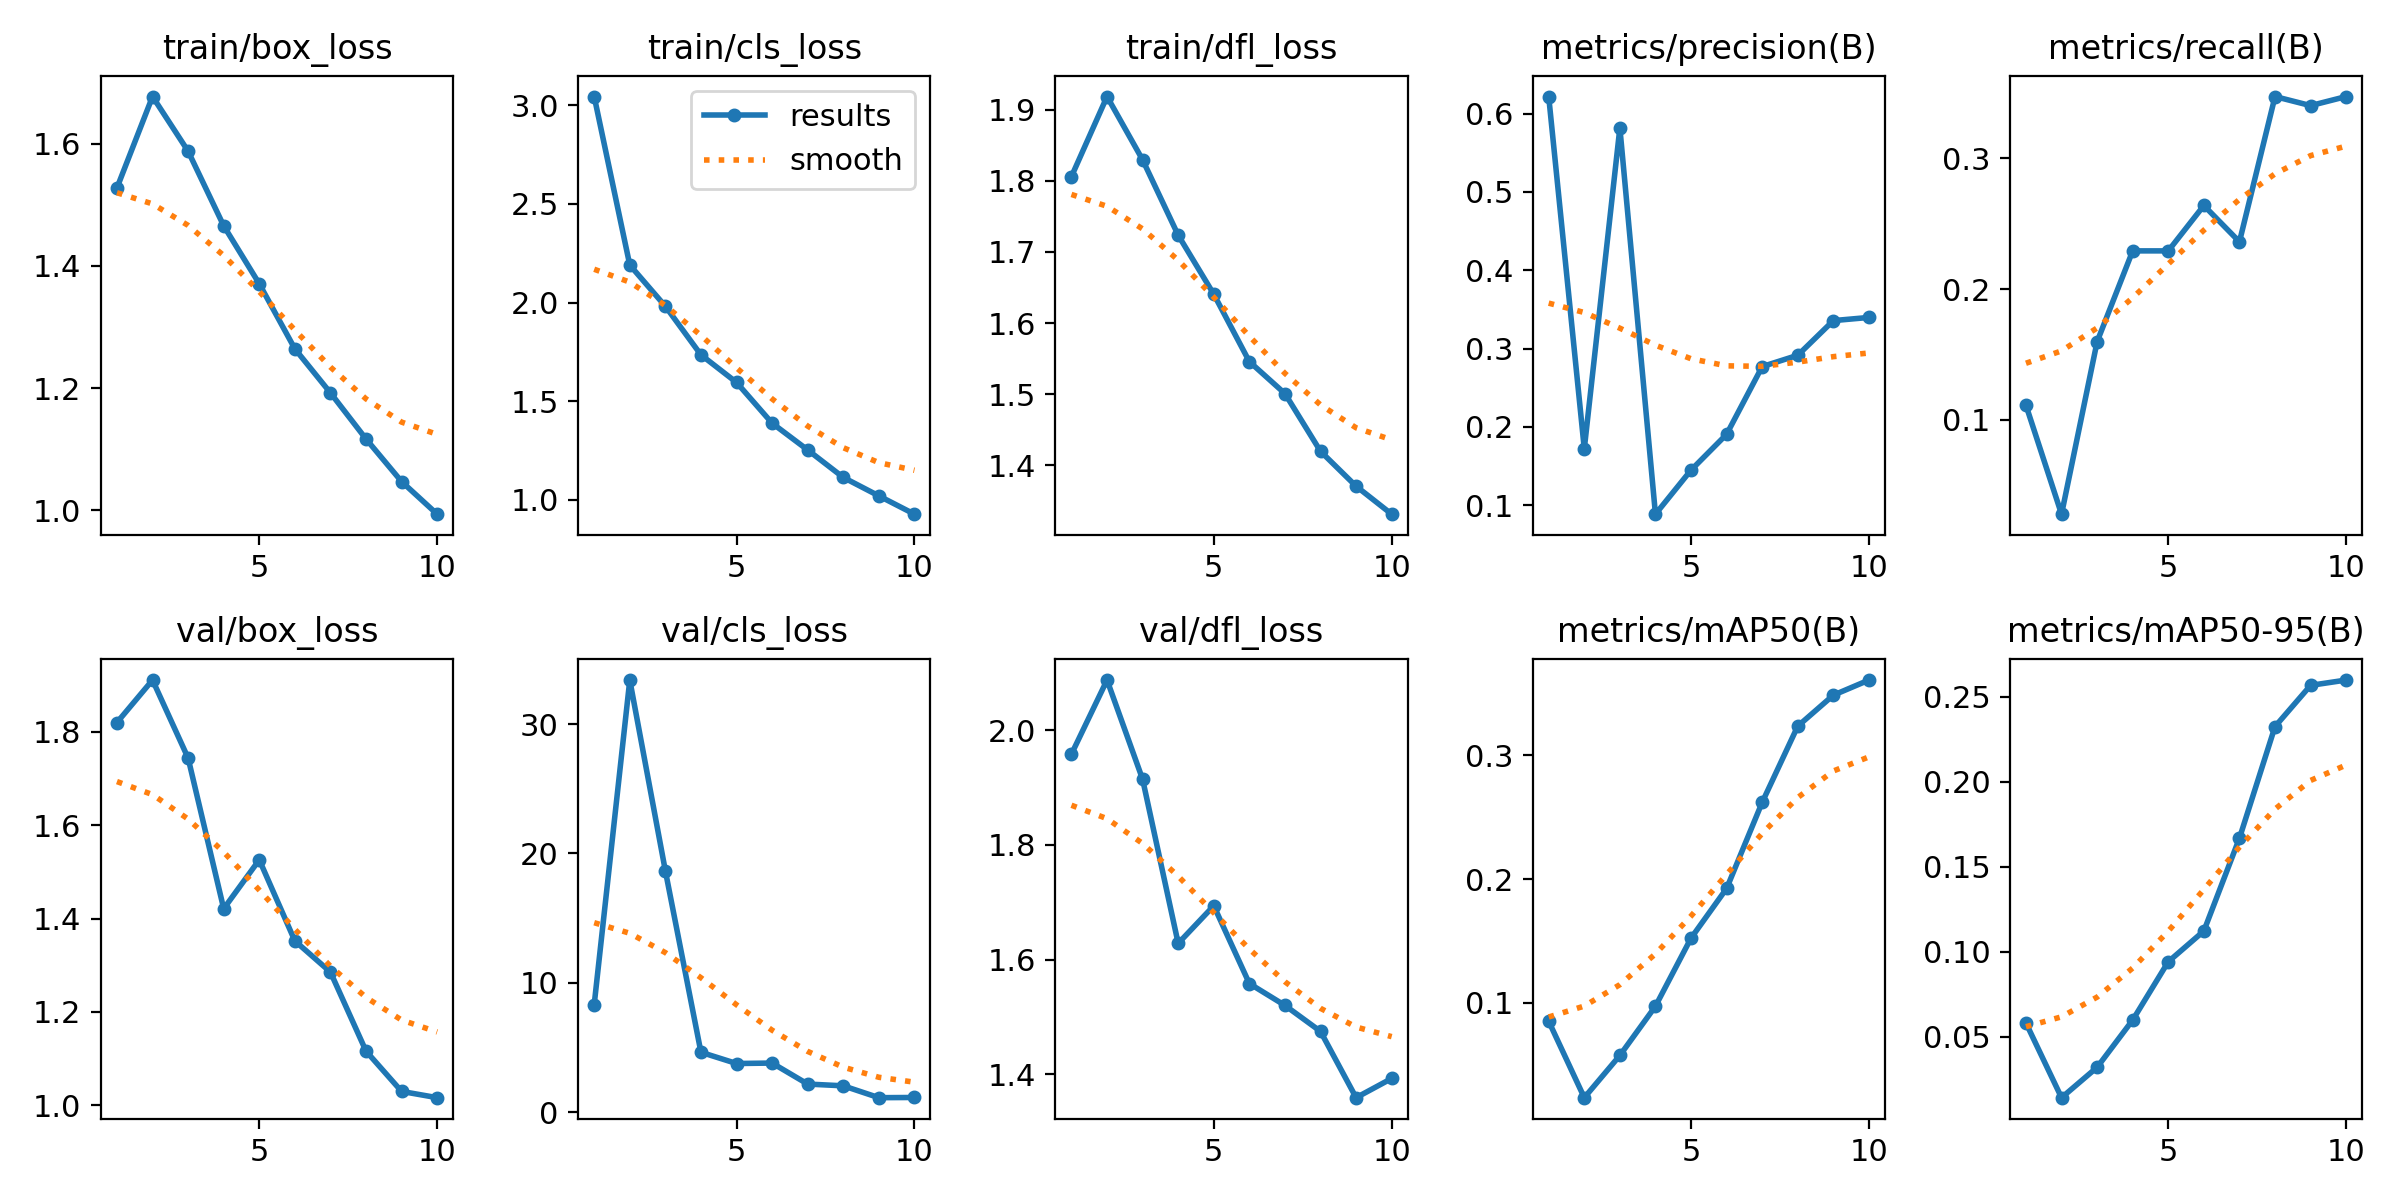

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


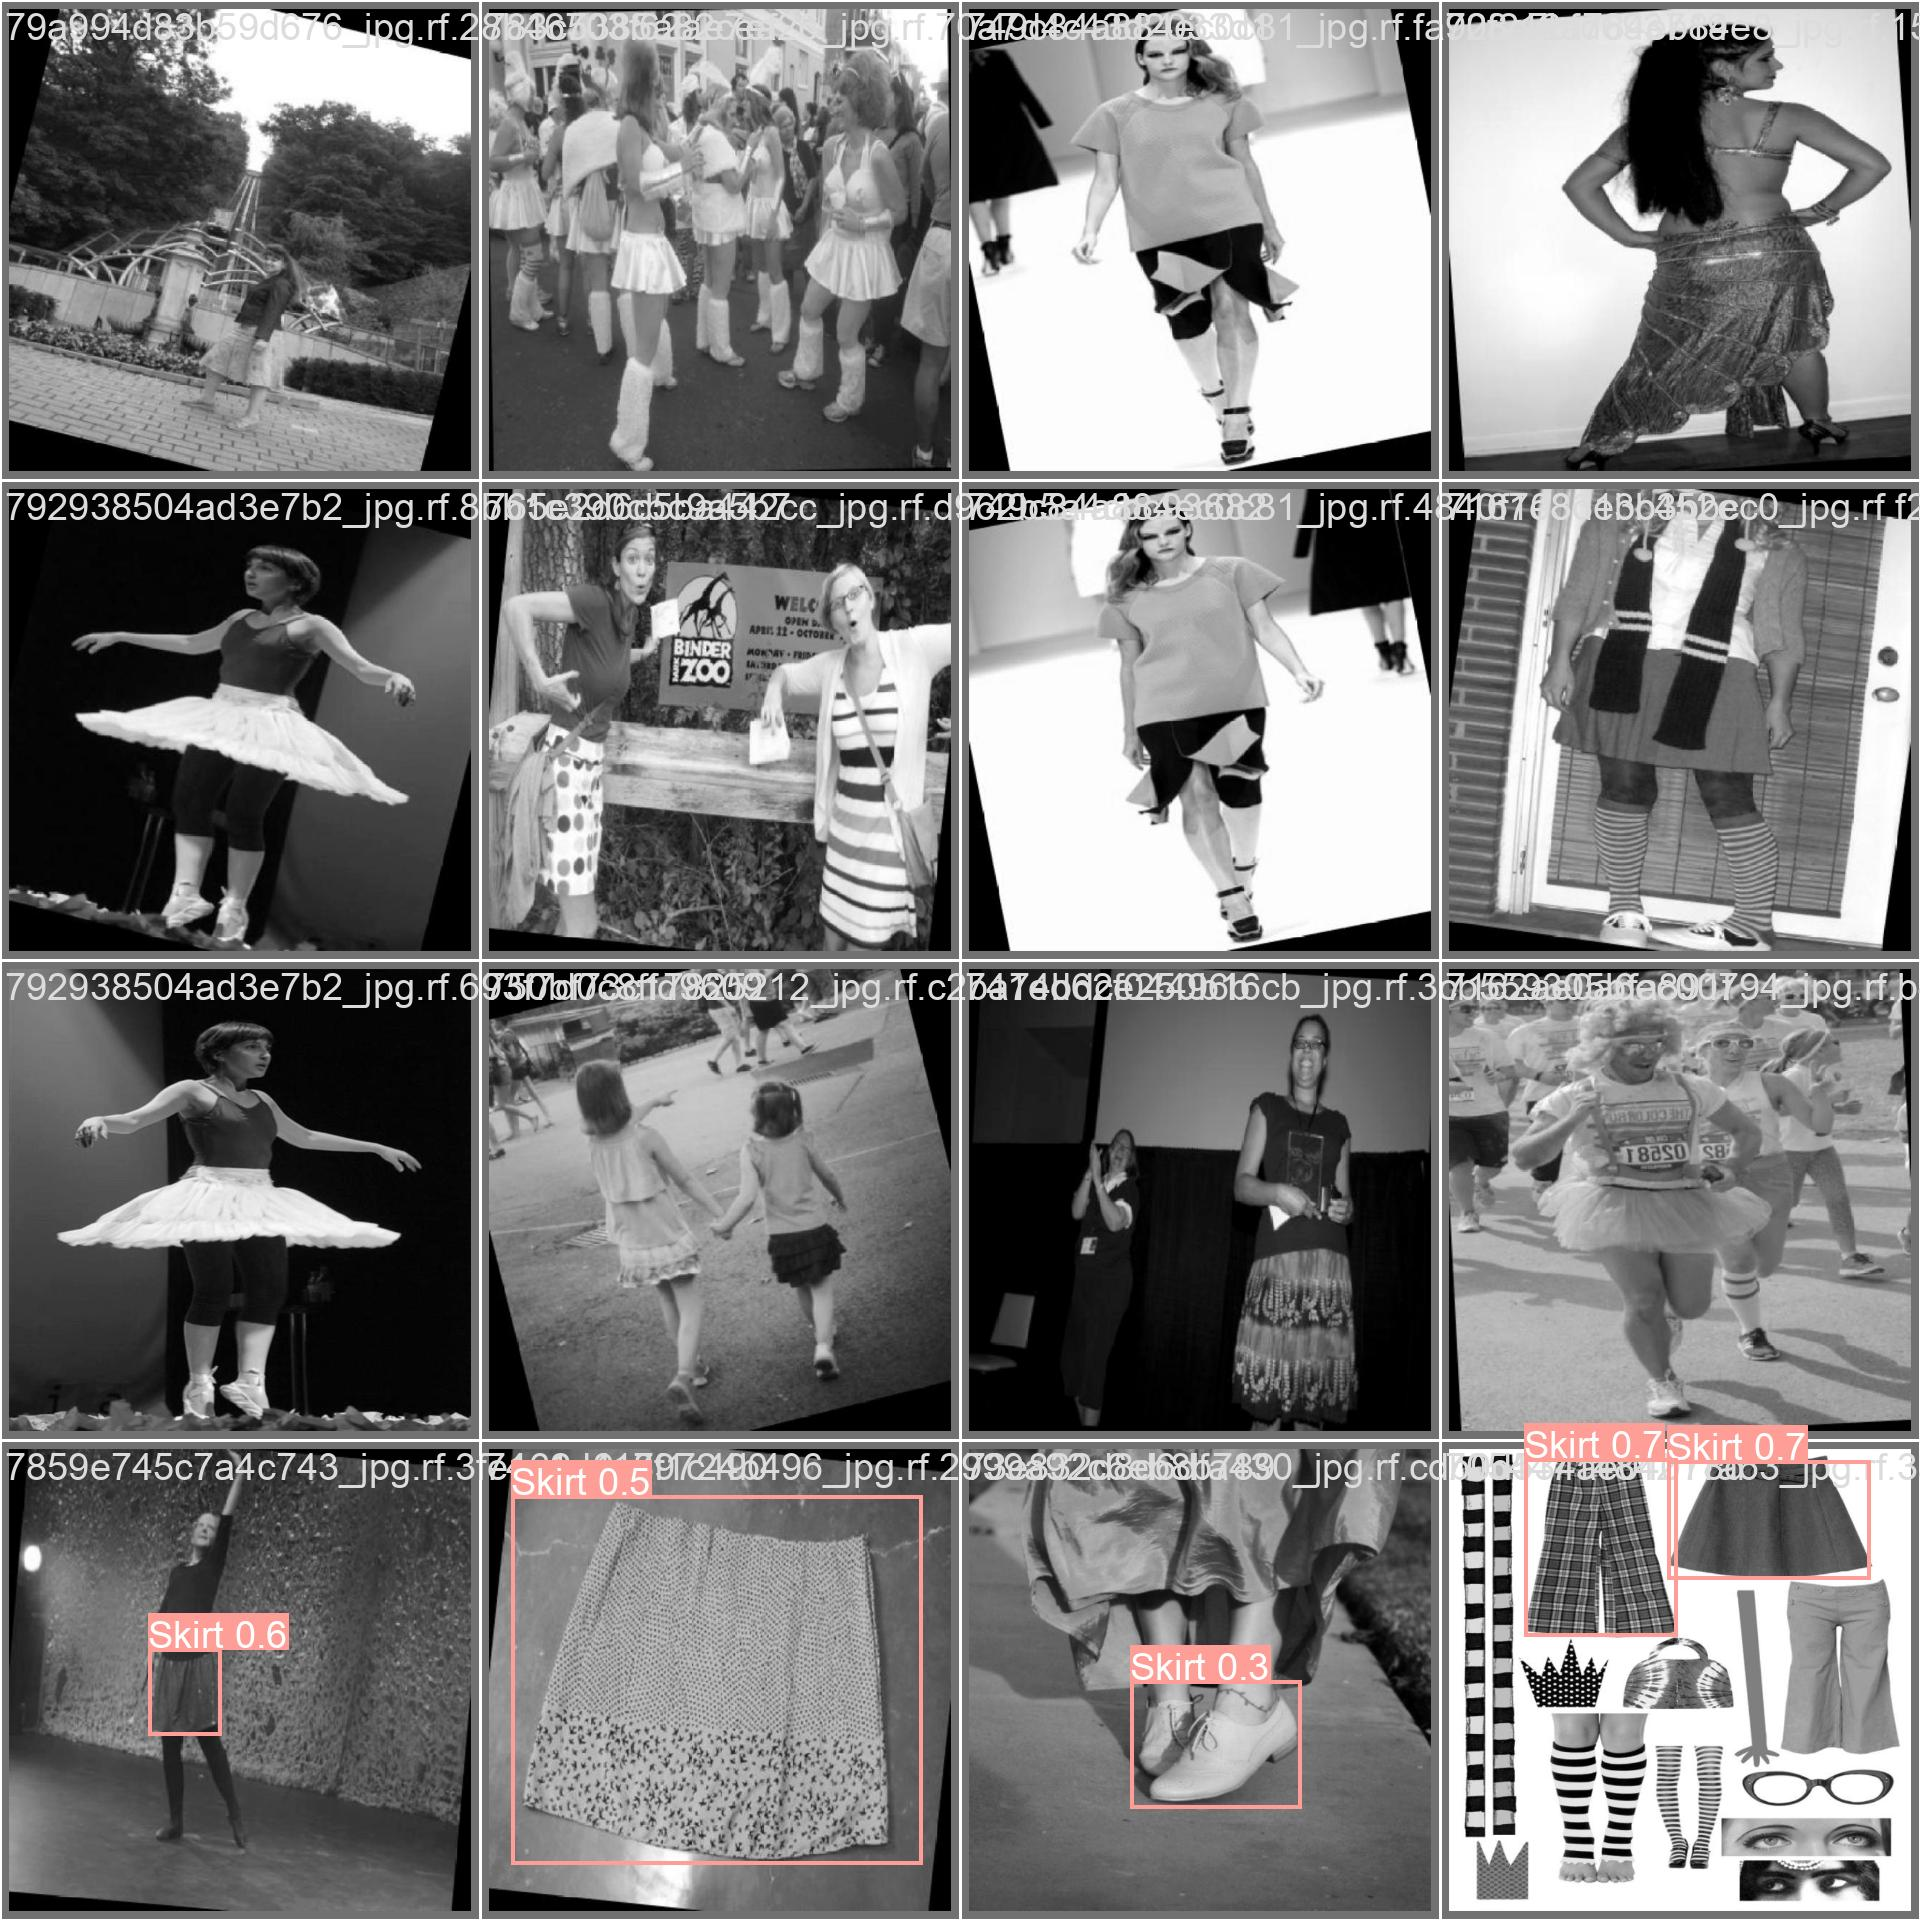

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch2_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Skirt-Detection-1/valid/labels.cache... 462 images, 410 backgrounds, 0 corrupt: 100% 462/462 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:10<00:00,  2.74it/s]
                   all        462         73      0.339      0.347       0.36      0.259
                  Knee        462          1          0          0          0          0
                 Skirt        462         72      0.677      0.694      0.721      0.518
Speed: 1.8ms preprocess, 14.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/255 /content/Skirt-Detection-1/test/images/000284a717e801dd_jpg.rf.5b77f3728942b9febeb82b839a28ebb4.jpg: 800x800 (no detections), 22.5ms
image 2/255 /content/Skirt-Detection-1/test/images/000284a717e801dd_jpg.rf.b72ed9ab22d2a977ed8f5954099cb54a.jpg: 800x800 (no detections), 22.4ms
image 3/255 /content/Skirt-Detection-1/test/images/002ccc8f04ca0438_jpg.rf.9ccac3e5f01e8f4be0b20c8dccdcb039.jpg: 800x800 4 Skirts, 22.5ms
image 4/255 /content/Skirt-Detection-1/test/images/0045629f84efe3a3_jpg.rf.47b7b5688cd78df31898acefb50abe85.jpg: 800x800 (no detections), 22.5ms
image 5/255 /content/Skirt-Detection-1/test/images/008e55cd62329b2d_jpg.rf.a0cc21808cdf5033919eb5c7b3125138.jpg: 800x800 (no detections), 22.4ms
image 6/255 /content/Skirt-Detection-1/test/images/00980ca30c06bc4c_jpg.rf.aa491f9e17a0c4ca8198590d5d6a3c

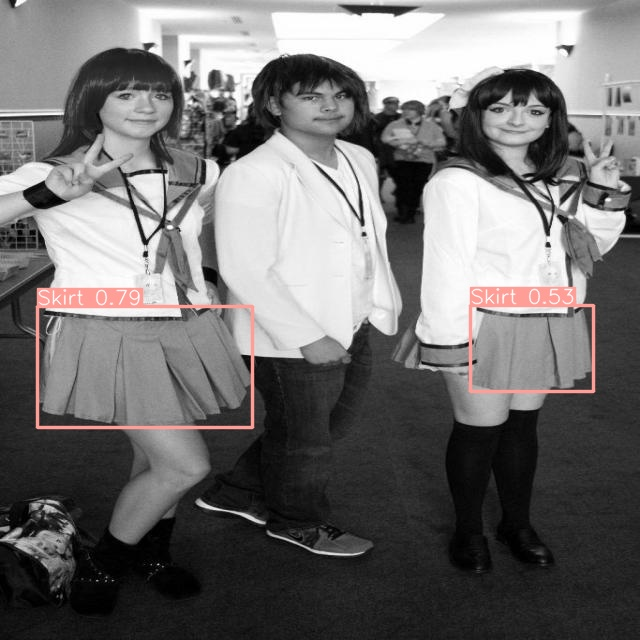

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[9:10]:
  display(Image(filename=image_path, width=600))
  print("\n")